In [1]:
# Logistic Regression

Logistic Regression is a binary classification method. The key idea is learning a mapping from a feature vector to a probability, a number between $0$ and $1$. It is similar to least-squares in the sense that (apart from some extreme cases) it has a unique solution.

Suppose, for a set of objects $X$, each denoted by the feature vector $x_i \in \mathbb{R}^D$, we are given the answer to some true-false question, such as 'is object $i$ of class $c$?'. This answer is denoted by $y_i \in \{0, 1\}$. We are given a dataset of feature vectors $x_i$ along with the corresponding 'labels' $y_i$. For $i=1\dots N$

$$(y_i, x_i)$$

The model is 
$$
\Pr\{y_i = 1\} = \sigma(x_i^\top w)
$$
Here,
$\sigma(x)$ is the sigmoid function defined as
\begin{eqnarray}
\sigma(x) & = & \frac{1}{1+e^{-x}}
\end{eqnarray}

This is a generative model. To understand logistic regression as a generative model, consider the following metaphor: assume that for each data instance $x_i$, we select a biased coin with probability $p(y_i = 1| w, x) = \pi_i = \sigma(w^\top x_i)$, throw the coin and label the data item with class $y_i$ accordingly. 


Mathematically, we assume that each label $y_i$ is drawn from a Bernoulli distribution. That is: 
\begin{eqnarray}
\pi_i & = & \sigma(x_i^\top w) \\
y_i & \sim &\mathcal{BE}(\pi)
\end{eqnarray}

Here, we think of a biased coin with two sides denoted as $1$ and $0$ with probability of side $1$ as $\pi$, and consequently the probability of side $0$ with $1-\pi$. We denote the outcome of the coin toss with the random variable $y$. We write the probability as $p(y = 1) = \pi$ and probability of heads is $p(y = 0) = 1-\pi$. More compactly, the probability of the outcome of a toss, provided we know $\pi$, is written as
\begin{eqnarray}
p(y|\pi) = \pi^y(1-\pi)^y
\end{eqnarray}

SyntaxError: invalid syntax (<ipython-input-1-80e6c1cc271b>, line 3)

In logistic regression, we are given a dataset of form
\begin{eqnarray}
X & = &  \begin{pmatrix}
  x_{1,1} & x_{1,2} & \dots & x_{1,D} \\
  x_{2,1} & x_{2,2} & \dots & x_{2,D} \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{i,1} & x_{i,2} & \dots & x_{i,D}  \\
  \vdots & \vdots & \vdots & \vdots  \\
  x_{N,1} & x_{N,2} & \dots & x_{N,D} \\
\end{pmatrix} = 
\begin{pmatrix}
x_1^\top \\
x_2^\top \\
\dots \\
x_i^\top \\
\dots \\
x_N^\top
\end{pmatrix} 
\\
{y} & = & \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_i \\
\vdots \\
y_N
\end{pmatrix}
\end{eqnarray}
where $x_{i,j}$ denotes the $j$'th feature of the $i$'th data point. It is customary, to set a column entirely to $1$, for example $x_{i,D}=1$ for all $i$. This 'feature' is artificially added to the dataset to allow a slightly more flexible model. The $y_i$ denote the target class label of the
$i$'th object. In logistic regression, we consider the case of binary classification where $y_i \in \{0,1\}$. It is possible to use other encodings such as $y_i \in \{-1,1\}$; the derivations are similar.




### Properties of the sigmoid function
Note that

\begin{eqnarray}
\sigma(x) & = & \frac{e^x}{(1+e^{-x})e^x} = \frac{e^x}{1+e^{x}} \\
1 - \sigma(x) & = & 1 - \frac{e^x}{1+e^{x}} = \frac{1+e^{x} - e^x}{1+e^{x}} = \frac{1}{1+e^{x}}
\end{eqnarray}

\begin{eqnarray}
\sigma'(x) & = & \frac{e^x(1+e^{x}) - e^{x} e^x}{(1+e^{x})^2} = \frac{e^x}{1+e^{x}}\frac{1}{1+e^{x}} = \sigma(x) (1-\sigma(x))
\end{eqnarray}

\begin{eqnarray}
\log \sigma(x) & = & -\log(1+e^{-x}) = x - \log(1+e^{x}) \\
\log(1 - \sigma(x)) & = &  -\log({1+e^{x}})
\end{eqnarray}




Exercise: Plot the sigmoid function and its derivative.

### Learning the parameters

The likelihood of the observations, that is the probability of observing the class sequence is
\begin{eqnarray}
p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) &=& \left(\prod_{i : y_i=1} \sigma(w^\top x_i) \right) \left(\prod_{i : y_i=0}(1- \sigma(w^\top x_i)) \right)
\end{eqnarray}
Here, the left product is the expression for examples from class $1$ and the right product is for examples from class $0$.
We will look for the particular setting of the weight vector, the so called maximum likelihood solution, denoted by $w^*$.
\begin{eqnarray}
w^* & = & \arg\max_{w} {\cal L}(w)
\end{eqnarray}
where the loglikelihood function
\begin{eqnarray}
{\cal L}(w) & = & \log p(y_1, y_2, \dots, y_N|w, x_1, x_2, \dots, x_N ) \\
& = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i)) \\
& = & \sum_{i : y_i=1} w^\top x_i - \sum_{i : y_i=1} \log(1+e^{w^\top x_i}) - \sum_{i : y_i=0}\log({1+e^{w^\top x_i}}) \\
& = & \sum_i y_i w^\top x_i - \sum_{i} \log(1+e^{w^\top x_i}) \\
& = & y^\top X w - \mathbf{1}^\top logsumexp(0, X w)
\end{eqnarray}

Unlike the least-squares problem, an expression for direct evaluation of $w^*$ is not known so we need to resort to numerical optimization. 

### Optimization via gradient ascent

One way for
optimization is gradient ascent
\begin{eqnarray}
w^{(\tau)} & \leftarrow & w^{(\tau-1)} + \eta \nabla_w {\cal L}
\end{eqnarray}
where
\begin{eqnarray}
\nabla_w {\cal L} & = &
\begin{pmatrix}
{\partial {\cal L}}/{\partial w_1} \\
{\partial {\cal L}}/{\partial w_2} \\
\vdots \\
{\partial {\cal L}}/{\partial w_{D}}
\end{pmatrix}
\end{eqnarray}
is the gradient vector.

#### Evaluating the gradient
The partial derivative of the loglikelihood with respect to the $k$'th entry of the weight vector is given by the chain rule as
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \frac{\partial{\cal L}}{\partial \sigma(u)} \frac{\partial \sigma(u)}{\partial u} \frac{\partial u}{\partial w_k}
\end{eqnarray}

\begin{eqnarray}
{\cal L}(w) & = & \sum_{i : y_i=1} \log \sigma(w^\top x_i) + \sum_{i : y_i=0} \log (1- \sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial{\cal L}(\sigma)}{\partial \sigma} & = &  \sum_{i : y_i=1} \frac{1}{\sigma(w^\top x_i)} - \sum_{i : y_i=0} \frac{1}{1- \sigma(w^\top x_i)}
\end{eqnarray}

\begin{eqnarray}
\frac{\partial \sigma(u)}{\partial u} & = & \sigma(w^\top x_i) (1-\sigma(w^\top x_i))
\end{eqnarray}

\begin{eqnarray}
\frac{\partial w^\top x_i }{\partial w_k} & = & x_{i,k}
\end{eqnarray}


So the gradient is
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{\sigma(w^\top x_i)} x_{i,k} - \sum_{i : y_i=0} \frac{\sigma(w^\top x_i) (1-\sigma(w^\top x_i))}{1- \sigma(w^\top x_i)} x_{i,k} \\
& = & \sum_{i : y_i=1} {(1-\sigma(w^\top x_i))} x_{i,k} - \sum_{i : y_i=0} {\sigma(w^\top x_i)} x_{i,k}
\end{eqnarray}

We can write this expression more compactly by noting
\begin{eqnarray}
\frac{\partial{\cal L}}{\partial w_k} & = & \sum_{i : y_i=1} {(\underbrace{1}_{y_i}-\sigma(w^\top x_i))} x_{i,k} + \sum_{i : y_i=0} {(\underbrace{0}_{y_i} - \sigma(w^\top x_i))} x_{i,k} \\
& = & \sum_i (y_i - \sigma(w^\top x_i)) x_{i,k}
\end{eqnarray}

The update rule is
\begin{eqnarray}
w^{(\tau)} = w^{(\tau-1)} + \eta X^\top (y-\sigma(X w))
\end{eqnarray}




In [2]:
%matplotlib inline
from cvxpy import *
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import pandas as pd

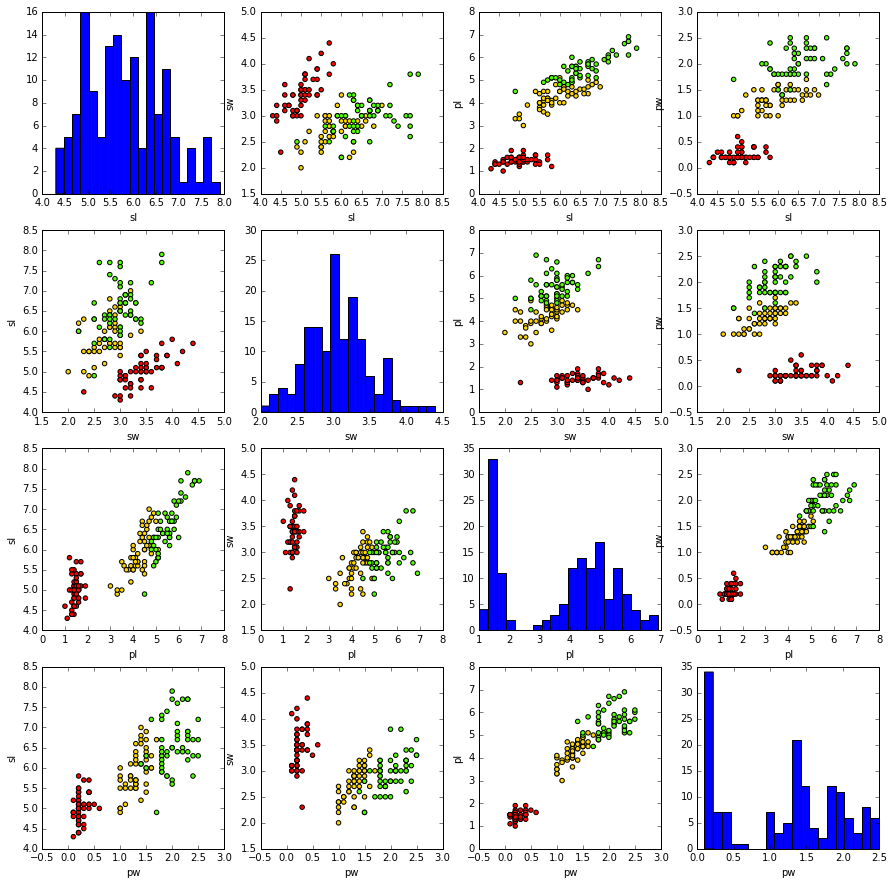

[[0]
 [0]]
[[ 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  0.2  0.2  0.1  0.1
   0.2  0.4  0.4  0.3  0.3  0.3  0.2  0.4  0.2  0.5  0.2  0.2  0.4  0.2
   0.2  0.2  0.2  0.4  0.1  0.2  0.1  0.2  0.2  0.1  0.2  0.2  0.3  0.3
   0.2  0.6  0.4  0.3  0.2  0.2  0.2  0.2  1.4  1.5  1.5  1.3  1.5  1.3
   1.6  1.   1.3  1.4  1.   1.5  1.   1.4  1.3  1.4  1.5  1.   1.5  1.1
   1.8  1.3  1.5  1.2  1.3  1.4  1.4  1.7  1.5  1.   1.1  1.   1.2  1.6
   1.5  1.6  1.5  1.3  1.3  1.3  1.2  1.4  1.2  1.   1.3  1.2  1.3  1.3
   1.1  1.3  2.5  1.9  2.1  1.8  2.2  2.1  1.7  1.8  1.8  2.5  2.   1.9
   2.1  2.   2.4  2.3  1.8  2.2  2.3  1.5  2.3  2.   2.   1.8  2.1  1.8
   1.8  1.8  2.1  1.6  1.9  2.   2.2  1.5  1.4  2.3  2.4  1.8  1.8  2.1
   2.4  2.3  1.9  2.3  2.5  2.3  1.9  2.   2.3  1.8  1. ]
 [ 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2  0.2  0.1  0.2  0.2  0.1  0.1
   0.2  0.4  0.4  0.3  0.3  0.3  0.2  0.4  0.2  0.5  0.2  0.2  0.4  0.2
   0.2  0.2  0.2  0.4  0.1  0.2  0.1  0.2  0.2  0.1  0.2  0.2  0.3 

ValueError: shapes (2,151) and (3,1) not aligned: 151 (dim 1) != 3 (dim 0)

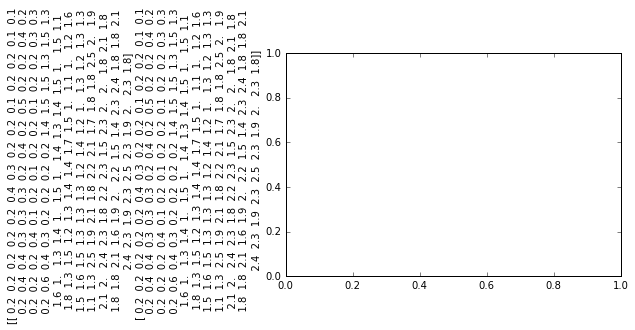

In [8]:
df_iris = pd.read_csv(u'data/iris.txt',sep=' ')

c = np.matrix('[0,0]')
from itertools import product 

keys = ['sl','sw','pl','pw']

i = 0
N = len(keys)

plt.figure(figsize=(15,15))

for v,w in product(keys, keys):
    i+=1
    plt.subplot(N,N,i)
    if v == w:
        plt.hist(df_iris[v],bins=20)
        plt.xlabel(v)
    else:
        plt.scatter(df_iris[v],df_iris[w],c=df_iris['c'],cmap='prism')
        y = c.T
        plt.xlabel(v)
        plt.ylabel(w)
        
plt.show()

x = np.array((df_iris[v], df_iris[w]))
plt.ylabel(x)
#y = np.matrix('[0,0,1,0,0,1]').T

N = x.shape[0]
#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
X = np.hstack((x, np.ones((N,1)) ))

def sigmoid(x):
    return 1/(1+np.exp(-x))

print(y)
print(X)

#w = np.random.randn(3,1).T

w = np.mat('[1;2;3]')

print(w)

print(sigmoid(X*w))
eta = 0.1

for i in range(10000):
    pr = sigmoid(X*w)
    w = w + eta*X.T*(y-pr)
    
print(np.hstack((y,pr)))

In [4]:
N = 1000
K = 10
Ke = 40-K

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.matrix(np.random.randn(N, K))
w_true = np.random.randn(K,1)

p = sigmoid(x*w_true)
u = np.random.rand(N,1)
y = (u < p)
y = y.astype(np.float64)

#A = np.hstack((np.power(x,0), np.power(x,1), np.power(x,2)))
X = np.hstack((x, np.random.randn(N, Ke )))




[[  2.49794442e-01]
 [ -6.21598146e-01]
 [ -1.41351320e-11]
 [  5.15477863e-01]
 [  4.41206401e-01]
 [ -5.39166758e-01]
 [ -9.18401453e-01]
 [ -7.89040646e-01]
 [ -4.78302589e-01]
 [  7.12693672e-01]
 [  6.42599080e-11]
 [  2.42294716e-03]
 [  1.04483116e-10]
 [ -4.85767426e-11]
 [  1.18774618e-10]
 [ -3.69684714e-11]
 [ -2.52954300e-11]
 [  1.81633244e-11]
 [  9.81669923e-11]
 [  1.71011744e-10]
 [  1.12170701e-10]
 [ -4.36200820e-11]
 [  6.64932944e-11]
 [  1.23179850e-11]
 [  1.04084639e-11]
 [  5.56024806e-11]
 [ -2.37387395e-11]
 [ -1.66178736e-11]
 [  1.17234894e-10]
 [ -1.45114394e-10]
 [ -8.69499403e-11]
 [ -5.22153472e-11]
 [  1.52814835e-10]
 [  3.77331260e-11]
 [ -3.29338718e-11]
 [ -1.94572766e-11]
 [ -1.01277419e-10]
 [ -1.09752809e-10]
 [ -1.42632581e-10]
 [ -2.12031663e-10]]


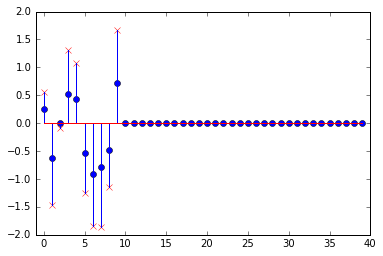

In [5]:
z = np.zeros((N,1))
# Construct the problem.
w = Variable(K+Ke)
objective = Minimize(25.5*norm(w, 1) -y.T*X*w + sum_entries(log_sum_exp(hstack(z, X*w),axis=1)))
#constraints = [0 <= x, x <= 10]
#prob = Problem(objective, constraints)
prob = Problem(objective)

# The optimal objective is returned by prob.solve().
result = prob.solve()
# The optimal value for x is stored in x.value.
print(w.value)
# The optimal Lagrange multiplier for a constraint
# is stored in constraint.dual_value.
#print(constraints[0].dual_value)

#plt.show()

plt.stem(w.value)
plt.stem(w_true,markerfmt='xr')

plt.gca().set_xlim((-1, K+Ke))
plt.show()



In [5]:
%connect_info

{
  "stdin_port": 52252, 
  "ip": "127.0.0.1", 
  "control_port": 52253, 
  "hb_port": 52254, 
  "signature_scheme": "hmac-sha256", 
  "key": "ea79abbc-0894-4390-90e4-df49b34619e0", 
  "shell_port": 52250, 
  "transport": "tcp", 
  "iopub_port": 52251
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing /Users/cemgil/Library/Jupyter/runtime/kernel-0e1f423d-e753-4e58-a8b9-87b5530794df.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [9]:
norm(w,1)

Expression(CONVEX, POSITIVE, (1, 1))